In [2]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('../..')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'gold', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']

In [3]:
# trk and jet pt bins
trk_pt_lo = [0, 1, 2, 5]
trk_pt_hi = [1, 2, 5, 20]

jet_pt_lo = [5, 10, 20]
jet_pt_hi = [10, 20, 40]
jet_pt_sel = 1


In [4]:
# file defs

base_dir = "/global/cfs/cdirs/alice/kdevero/"
fs = ["./pt5_R0p4_s5p02.root"]
f_names = ["pythia pp"]

n_jetpt = "h_jet_pt_JetPt_R0.4_0.15"
n_shape_pt = "h_jet-trk_shape_RL_TrkPt_JetPt_R0.4_0.15"
n_shape_z = "h_jet-trk_shape_RL_z_JetPt_R0.4_0.15"


Njets : 70205.0
Njets : 6623.0
Njets : 517.0


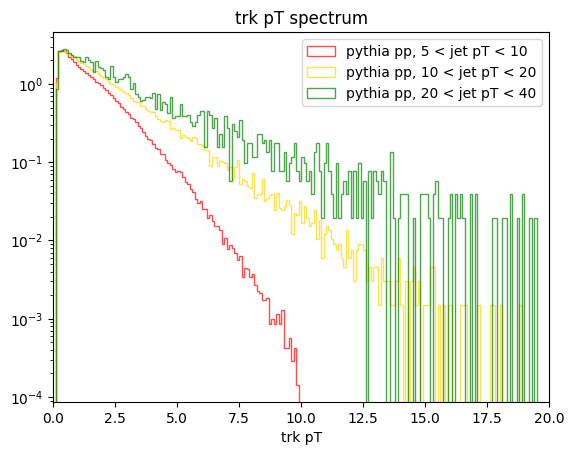

In [5]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    for jetpti in range(len(jet_pt_lo)):
        
        h = f[n_jetpt]
        h_jetpt = h.to_numpy()[0]
        pt_range = (findbin(h.axis("x"), jet_pt_lo[jetpti]), findbin(h.axis("x"), jet_pt_hi[jetpti]))
        h_jetpt = h_jetpt[pt_range[0]:pt_range[1]]
        N_jets = np.sum(h_jetpt)
        print("Njets : " + str(N_jets))

        h = f[n_shape_pt]
        bin_edges = h.axis("y").edges()
        bin_width = bin_edges[1] - bin_edges[0]
        
        h_numpy = h.to_numpy()[0]
        pt_range = (findbin(h.axis("z"), jet_pt_lo[jetpti]), findbin(h.axis("z"), jet_pt_hi[jetpti]))
        h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
        
        this_slice = projectionY(h_numpy)
        this_slice = this_slice / (bin_width * N_jets)
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[2*jetpti], label=f_names[fi] + ", " + str(jet_pt_lo[jetpti]) + " < jet pT < " + str(jet_pt_hi[jetpti]))
    

plt.legend()
plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
#plt.ylim(1, 10)
#plt.xscale('log')
plt.yscale('log')
plt.show()



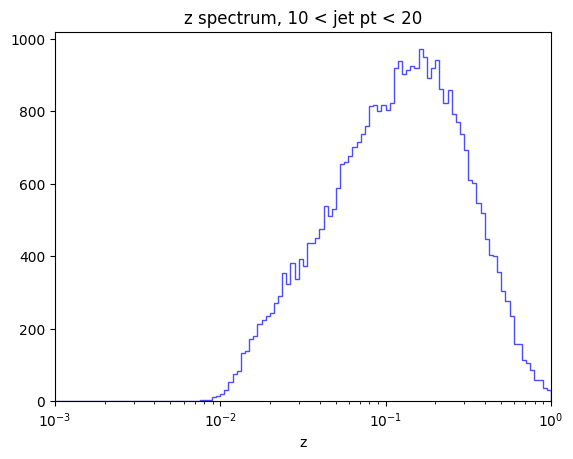

In [6]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("y").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
        
    this_slice = projectionY(h_numpy)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color="blue")
    
    plt.title("z spectrum, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel]) )
    plt.xlabel('z')
    plt.xlim(1e-3, 1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    

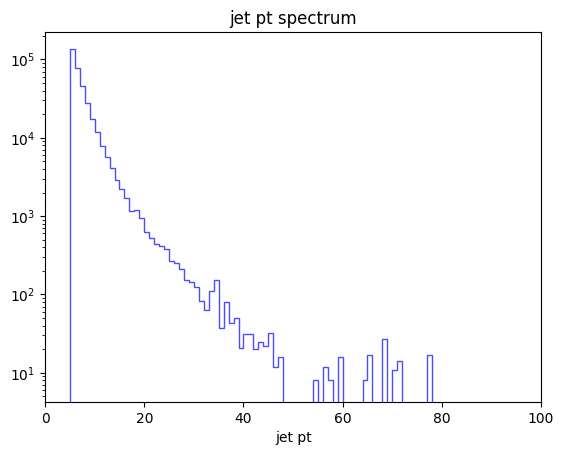

In [7]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("z").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    h_numpy = h.to_numpy()[0]
    this_slice = projectionZ(h_numpy)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color="blue")
    
    plt.title("jet pt spectrum") 
    plt.xlabel('jet pt')
    plt.xlim(0, 100)
    #plt.xscale('log')
    plt.yscale('log')
    plt.show()
    

In [8]:
# find number of jets in selected jet pt bin

h = f[n_jetpt]
h_jetpt = h.to_numpy()[0]
pt_range = (findbin(h.axis("x"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("x"), jet_pt_hi[jet_pt_sel]))
h_jetpt = h_jetpt[pt_range[0]:pt_range[1]]
N_jets = np.sum(h_jetpt)
print("Njets : " + str(N_jets))


Njets : 6623.0


(0, 10)
13451.0
(10, 20)
10580.0
(20, 50)
12214.0
(50, 200)
3294.0


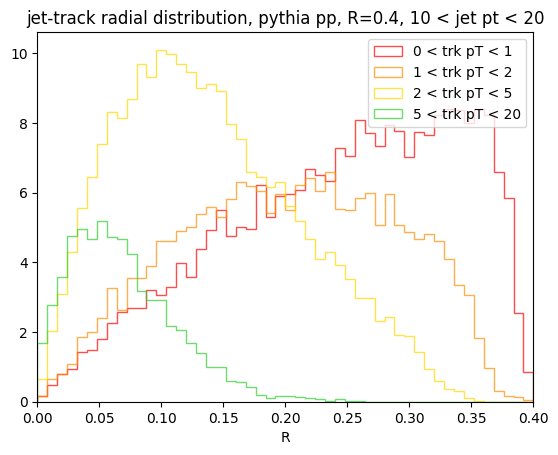

In [9]:
hs = []

for fi in range(len(fs)):
    f = ur.open(fs[fi])
    h = f[n_shape_pt]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
    
    integrals = []
    h_trk = []
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)

        this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
        print(np.sum(this_slice))
        this_slice = this_slice / (N_jets * bin_width)

        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
        h_trk.append(this_slice)
    hs.append(h_trk)

    plt.legend(loc='upper right')
    plt.title("jet-track radial distribution, " + f_names[fi] + ", R=0.4, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel])) 
    plt.xlabel('R')
    plt.xlim(0, 0.4)
    #plt.ylim(0, 0.5)
    plt.show()

[    0.   379.   963.  1781.  2823.  4034.  5412.  6782.  8196.  9623.
 11136. 12672. 14248. 15778. 17235. 18696. 20211. 21640. 23047. 24430.
 25799. 27129. 28444. 29697. 30971. 32190. 33373. 34598. 35821. 36976.
 38107. 39158. 40224. 41270. 42274. 43240. 44259. 45245. 46205. 47116.
 47983. 48866. 49676. 50393. 51061. 51691. 52248. 52699. 53016.]


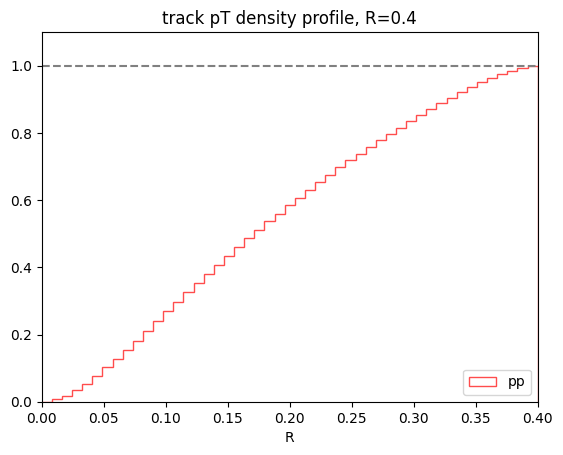

In [27]:
hs = []
for i in range(len(fs)):
    f = ur.open(fs[i])
    h = f[n_shape_pt]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = projectionX(zslice(h_numpy, pt_range[0], pt_range[1]))

    n_r_bins = 50
    bin_edges = np.linspace(0, 0.4, n_r_bins)
    bin_widths = 0.4 / n_r_bins
    
    h_to_graph = np.array([np.sum(h_numpy[0:findbin(h.axis("x"), bin_edges[i])]) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    # normalization by inclusive RL selection
    h_to_graph = h_to_graph / h_to_graph[len(h_to_graph)-1]
    hs.append(h_to_graph)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label=f_names[i])
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track pT density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()


(0, 2)
(2, 5)
(5, 12)
(12, 50)


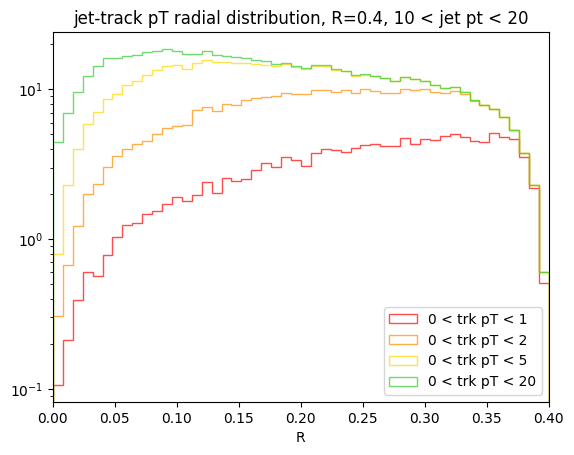

[]


In [28]:
f = ur.open(fs[0])
h = f[n_shape_pt]
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]

h_numpy = h.to_numpy()[0]
pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])

for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, 0, trk_pt_range[1])
    this_slice = this_slice / (N_jets * bin_width)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(0, trk_pt_hi[i]))
    
plt.legend(loc='lower right')
plt.title("jet-track pT radial distribution, R=0.4, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel])) 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
#plt.ylim(5e2, 2e5)
plt.show()
print(integrals)